# <b> Yukie Kuang Capstone: Colon Tissue Image Classification 

## Table of Contents
[Sprint 1](#capstone-sprint-1)
- [Dataset](#dataset)<br>
- [Setup Enviornment](#setup-enviornment)<br>
- [Preliminary EDA](#exploratory-data-analysis)
<br>

[Sprint 2](#sprint-2)
- [Overview]()

[Sprint 3](#sprint-3)

## Sprint 1:


## Overview 

Utilizing the MHIST dataset, as referenced in a recent publication and another available on GitHub taken from the hospital in Chaoyang, Beijing, this project's primary objective is to develop a machine learning model that can accurately identify malignancies in various colon tissue biopsies. This effort is particularly significant for researchers specializing in gastrointestinal anatomy, as it provides valuable insights with the potential to drive further research and contribute to the development of new treatments for colon-related diseases.

The initial phase of this project involves conducting basic exploratory analysis and visualization of the two datasets. Our approach, centered around the use of advanced methodologies like convolutional neural networks, aims to achieve two key goals: firstly, to significantly improve the accuracy of classifying diseased colon tissue, and secondly, to enhance our comprehension of the unique challenges and possibilities inherent in applying AI to medical image analysis. This dual focus aligns with the broader goal of harnessing AI's power to revolutionize diagnostic processes in the field of pathology. 

## Dataset

<br>The datasets comes with labeled .csv files that lables the images.

<br>[MHIST](https://bmirds.github.io/MHIST/)
<br>_Contains:_
- Test 977 images
- Train 2,175 
<br>* dataset is not split 
- 

<br>[Chaoyang](https://github.com/bupt-ai-cz/HSA-NRL/?tab=readme-ov-file)
<br>_Contains:_
- Test 2,139 images 
- Train 4,021 images
<br>* were already pre-split into seperate folders upon download
- 

## Setup Enviornment


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tifffile
import tensorflow as tf
import os
from PIL import Image
import cv2
import json


/Users/yukiekuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yukiekuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
2024-05-01 21:25:41.179405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exploratory Data Analysis

First we will extract some information from the csv files in the Chaoyang and MHIST dataset.

In [2]:
mhist_csv = pd.read_csv('/Users/yukiekuang/Downloads/annotations.csv')


In [3]:
mhist_csv.head()


Image Name Majority Vote Label  \
0  MHIST_aag.png                  HP   
1  MHIST_aah.png                  HP   
2  MHIST_aar.png                  HP   
3  MHIST_aay.png                  HP   
4  MHIST_abs.png                  HP   

   Number of Annotators who Selected SSA (Out of 7) Partition  Unnamed: 4  \
0                                                 2      test         NaN   
1                                                 2      test         NaN   
2                                                 0      test         NaN   
3                                                 1      test         NaN   
4                                                 2      test         NaN   

   Unnamed: 5 Unnamed: 6  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN

In [4]:
mhist_csv['Partition'].value_counts()

Partition
test    977
Name: count, dtype: int64

In [5]:
mhist_csv_df = mhist_csv['Majority Vote Label'].value_counts()

In [6]:
mhist_csv_df

Majority Vote Label
HP     617
SSA    360
Name: count, dtype: int64

In [7]:
mhist_csv.describe()

Number of Annotators who Selected SSA (Out of 7)  Unnamed: 4  \
count                                        977.000000         0.0   
mean                                           2.925281         NaN   
std                                            2.478090         NaN   
min                                            0.000000         NaN   
25%                                            1.000000         NaN   
50%                                            2.000000         NaN   
75%                                            5.000000         NaN   
max                                            7.000000         NaN   

       Unnamed: 5  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

The MHIST dataset seems to be based on a scoring of annotators.

In [8]:
cy_df_train = pd.read_json('/Users/yukiekuang/Downloads/train.json')

In [9]:
cy_df_train.head()

label                             name
0      1  train/353042_4-IMG005x014-1.JPG
1      1  train/353042_4-IMG005x015-1.JPG
2      1  train/353042_4-IMG006x010-1.JPG
3      1  train/353042_4-IMG007x011-1.JPG
4      1  train/353042_4-IMG007x015-1.JPG

In [10]:
cy_df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4021 non-null   int64 
 1   name    4021 non-null   object
dtypes: int64(1), object(1)
memory usage: 63.0+ KB


In [11]:
cy_df_train_df = cy_df_train['label'].value_counts()

In [12]:
cy_df_train_df

label
2    1404
0    1111
1     842
3     664
Name: count, dtype: int64

In [13]:
cy_df_test = pd.read_json('/Users/yukiekuang/Downloads/test.json')

In [14]:
cy_df_test.head()

label                          name
0      2  test/535940-IMG009x022-2.JPG
1      2  test/535940-IMG009x023-2.JPG
2      2  test/535940-IMG009x026-2.JPG
3      2  test/535940-IMG010x011-2.JPG
4      2  test/535940-IMG010x012-2.JPG

In [15]:
cy_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2139 non-null   int64 
 1   name    2139 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.5+ KB


In [16]:
cy_df_test_df = cy_df_test['label'].value_counts()
cy_df_test_df

label
2    840
0    705
1    321
3    273
Name: count, dtype: int64

-----------

In [17]:
try:
    with open('/Users/yukiekuang/Downloads/train.json', 'r') as file:
        data = json.load(file)

    # Assuming data is a list of dictionaries
    for item in data:
        print(item)  # This prints each dictionary in the list

        # If you know the keys, you can access values like this:
        # print(item['your_key'])

except FileNotFoundError:
    print("The file was not found.")
except json.JSONDecodeError:
    print("Error decoding JSON.")

{'label': 1, 'name': 'train/353042_4-IMG005x014-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG005x015-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG006x010-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG007x011-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG007x015-1.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG008x014-0.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG009x015-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG009x016-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG010x014-1.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG012x024-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG013x024-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG013x025-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG014x024-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG014x025-0.JPG'}
{'label': 2, 'name': 'train/535940-IMG009x024-2.JPG'}
{'label': 2, 'name': 'train/535940-IMG010x008-2.JPG'}
{'label': 2, 'name': 'train/535940-IMG010x013-2.JPG'}
{'label': 2, 'name': 'train/535940-IMG010x021-2.JPG'}


In [18]:
try:
    with open('/Users/yukiekuang/Downloads/test.json', 'r') as file:
        data = json.load(file)

    # Assuming data is a list of dictionaries
    for item in data:
        print(item)  # This prints each dictionary in the list

        # If you know the keys, you can access values like this:
        # print(item['your_key'])

except FileNotFoundError:
    print("The file was not found.")
except json.JSONDecodeError:
    print("Error decoding JSON.")

{'label': 2, 'name': 'test/535940-IMG009x022-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG009x023-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG009x026-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x011-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x012-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x024-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x026-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x008-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x010-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x012-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x013-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x014-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x021-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x025-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x026-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x029-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG012x010-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG012x011-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG012x012-2

Write loop that loops through image files in folders utilizing the OS module

In [19]:
directory1 = '/Users/yukiekuang/Downloads/train'
# directory1 contains the train Chaoyang dataset
# Prepare an empty list to store the image data
image_data1 = []

for filename in os.listdir(directory1):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory1, filename)
        
        with Image.open(file_path) as img:
            #Append a tuple of file properties to the list
            image_data1.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df1 = pd.DataFrame(image_data1, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df1)

                       Filename        Size Mode Format
0       537699-IMG010x009-0.JPG  (512, 512)  RGB   JPEG
1     540293_1-IMG016x031-2.JPG  (512, 512)  RGB   JPEG
2       535953-IMG013x006-0.JPG  (512, 512)  RGB   JPEG
3       542441-IMG024x009-2.JPG  (512, 512)  RGB   JPEG
4     543358_2-IMG012x007-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
4016    538850-IMG006x037-0.JPG  (512, 512)  RGB   JPEG
4017    538377-IMG025x012-0.JPG  (512, 512)  RGB   JPEG
4018  543645_1-IMG013x019-2.JPG  (512, 512)  RGB   JPEG
4019  535997_1-IMG013x011-0.JPG  (512, 512)  RGB   JPEG
4020  539085_2-IMG017x013-2.JPG  (512, 512)  RGB   JPEG

[4021 rows x 4 columns]


In [20]:
directory2 = '/Users/yukiekuang/Downloads/test'
# directory2 contains the test Chaoyang dataset
# Prepare an empty list to store the image data
image_data2 = []

for filename in os.listdir(directory2):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory2, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data2.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df2 = pd.DataFrame(image_data2, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df2)

                       Filename        Size Mode Format
0     538880-3-IMG011x046-1.JPG  (512, 512)  RGB   JPEG
1     537690_1-IMG013x010-0.JPG  (512, 512)  RGB   JPEG
2     537688_2-IMG008x009-0.JPG  (512, 512)  RGB   JPEG
3     543086_1-IMG010x012-2.JPG  (512, 512)  RGB   JPEG
4       538898-IMG011x008-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
2134    541831-IMG035x022-2.JPG  (512, 512)  RGB   JPEG
2135  543086_1-IMG008x022-2.JPG  (512, 512)  RGB   JPEG
2136  538842_1-IMG006x004-0.JPG  (512, 512)  RGB   JPEG
2137  543086_1-IMG024x020-2.JPG  (512, 512)  RGB   JPEG
2138  538880-3-IMG024x051-3.JPG  (512, 512)  RGB   JPEG

[2139 rows x 4 columns]


In [21]:
directory3 = '/Users/yukiekuang/Downloads/images'
# directory3 contains the MHIST dataset
# Prepare an empty list to store the image data
image_data3 = []

for filename in os.listdir(directory3):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory3, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data3.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df3 = pd.DataFrame(image_data3, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df3)

           Filename        Size Mode Format
0     MHIST_djh.png  (224, 224)  RGB    PNG
1     MHIST_dis.png  (224, 224)  RGB    PNG
2     MHIST_atj.png  (224, 224)  RGB    PNG
3     MHIST_cou.png  (224, 224)  RGB    PNG
4     MHIST_awq.png  (224, 224)  RGB    PNG
...             ...         ...  ...    ...
3147  MHIST_avx.png  (224, 224)  RGB    PNG
3148  MHIST_cmg.png  (224, 224)  RGB    PNG
3149  MHIST_auc.png  (224, 224)  RGB    PNG
3150  MHIST_dhz.png  (224, 224)  RGB    PNG
3151  MHIST_dka.png  (224, 224)  RGB    PNG

[3152 rows x 4 columns]


Show a small sample of images from each dataset.

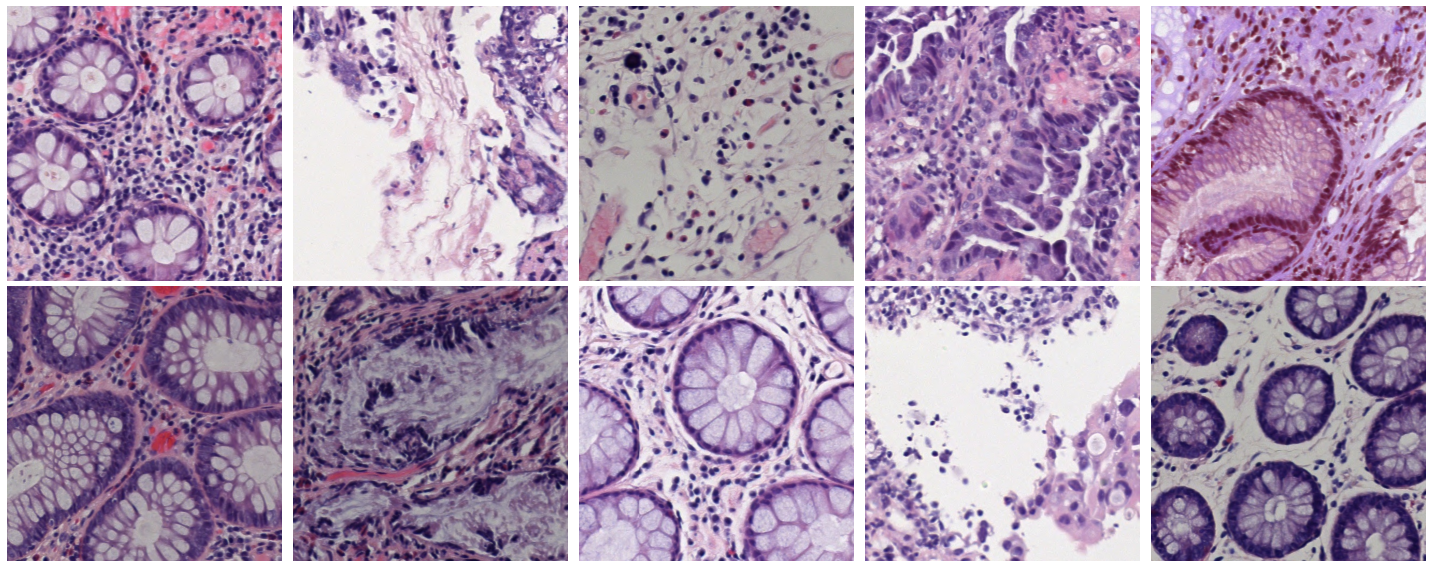

In [22]:
'''
create a function that passes in 3 parameters: image_path, position, and grid_size
when called, the function will create a subplot and place each positions 
'''

def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # defines each individual subplot within grid. 
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Set the number of images to display
num_images_to_show = 10

# Set Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df1))):
    file_path = os.path.join(directory1, df1.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

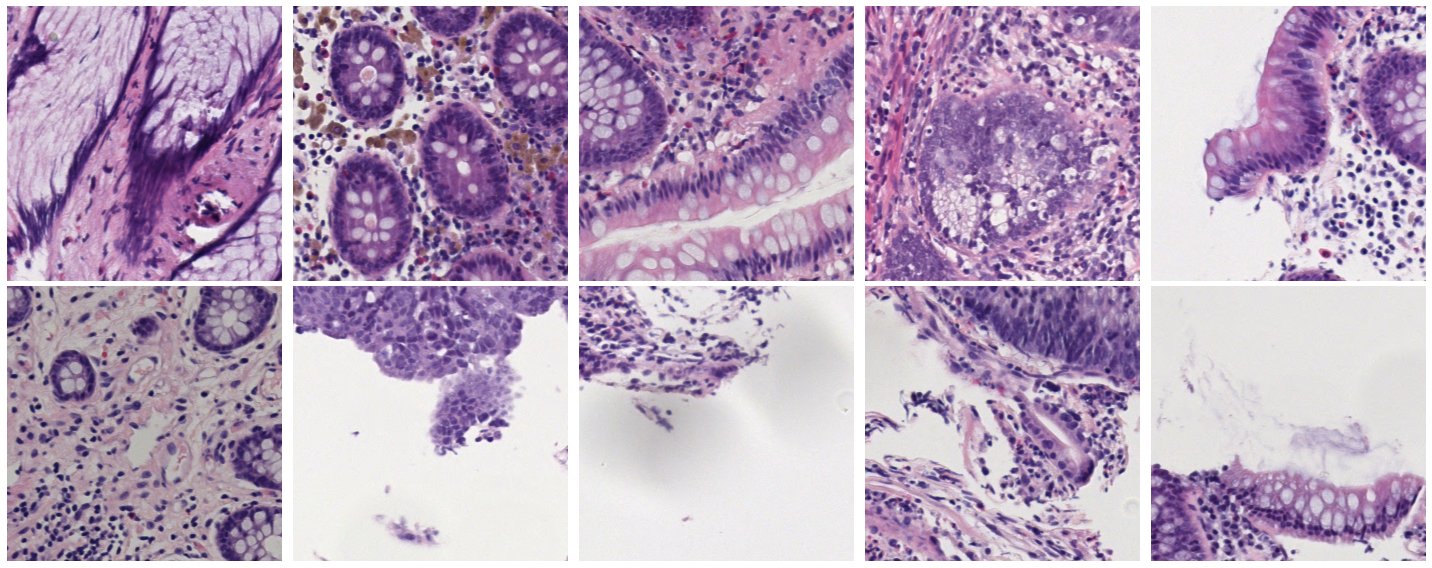

In [23]:
def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # Create a subplot in the specified grid position
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Number of images to display
num_images_to_show = 10

# Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df2))):
    file_path = os.path.join(directory2, df2.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

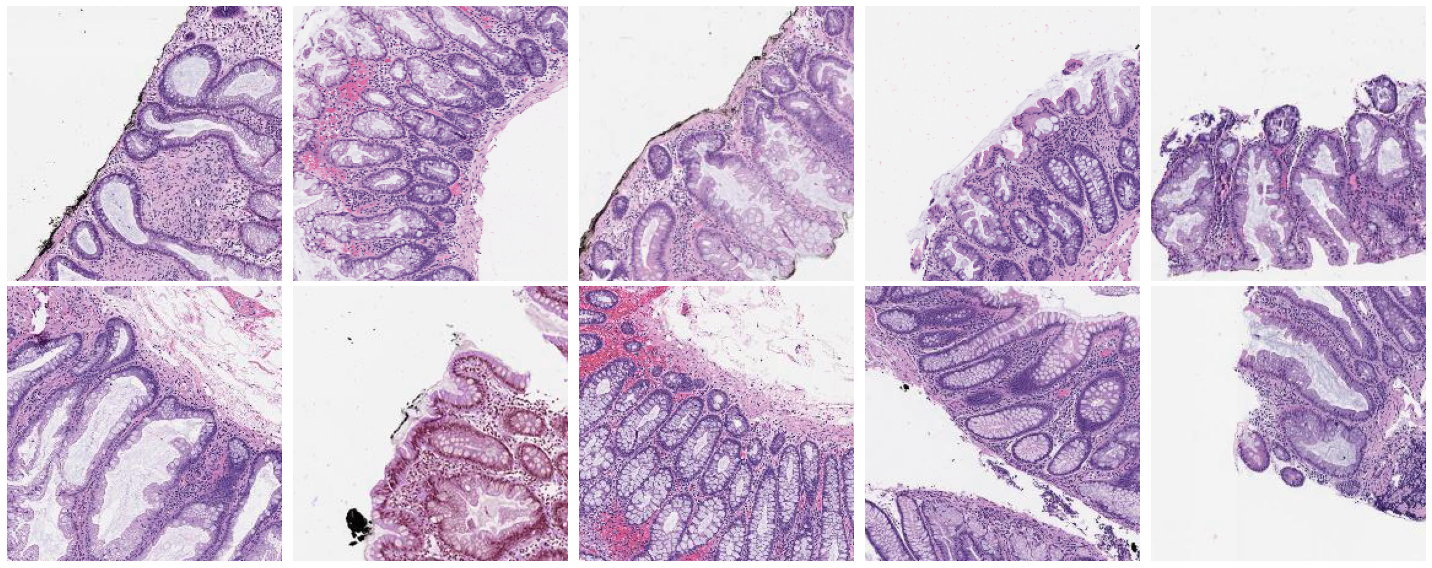

In [24]:
def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # Create a subplot in the specified grid position
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Number of images to display
num_images_to_show = 10

# Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df3))):
    file_path = os.path.join(directory3, df3.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

----------------

# Sprint 2


### Overview
From sprint 1, preliminary EDA was done to look at the 2 datasets from different sources. Although, the sizing between the two are different:
- MHIST dataset is 224 x 224
- Chaoyang dataset is 512 x 512
We can fix this by scaling the images by resizing or cropping the MHIST dataset. 

<br> Another finding is that the labels in:
- Chaoyang dataset has 4 labels "0" means normal, "1" means serrated, "2" means adenocarinoma, and "3" means adenoma 
- MHIST dataset has 2 lables HP (Hyperplastic Polyp) aka normal polyps have no potential to become malignant or SSA (Sessile Serated Adenoma)

So far: 
| <u>DataFrame        | <u>Label | <u>Count |
|------------------|-------|-------|
| <b>mhist_csv_df     | HP    | 617   |
|                  | SSA   | 360   |
| <b>cy_df_train_df   | 2     | 1404  |
|                  | 0     | 1111  |
|                  | 1     | 842   |
|                  | 3     | 664   |
| <b>cy_df_test_df    | 2     | 840   |
|                  | 0     | 705   |
|                  | 1     | 321   |
|                  | 3     | 273   |

Although the MHIST website's Dataset Description shows 3,152 images are in the zip file only 977 were labeled. [MHIST dataset]()

We will be combining the MHIST dataset with the Chaoyang dataset. This is because diagnosis of sessile serrated adenoma can be difficult at times, even for experienced pathologists. In this case it would be advantagous to have more positive for serated since it can be easily missed. Prevelance of false positive to be on the safe side when in the context of health care is better than being false negative. The idea is that the physician will run more tests post-classification. 

In the following pre-processing/EDA steps I will:
1. combine images with labels
    - combine chaoyang test and train images with corresponding labels
    - set hp and ssa to the chaoyang labels hp = 0 and ssa = 1 via mapping
    - drop unecessary columns and rename columns to match chaoyang dataset
2. resize the choayang dataset to match mhist's
3. split the mhist dataset into test and split
4. merge that to the pre-split test and train chaoyang dataset 
5. run the Chaoyang dataset through 
<br> a. Pixel Value Scaling
<br> b. noise detetion
<br> c. data augmentation 
<br> d. edge detection


# Sprint 3

Prior to running Steps 3-5. in Sprint 2, in Sprint 3, we will enhance the code from Sprint 2 to include functionality for retrieving the dataset name along with other data, such as images and labels. Additionally, we will not be addressing class imbalance issues as adding the MHIST dataset will cause complexity. In the interest of time, instead, we will focus on ensuring robust data integration and functionality enhancements, leaving class imbalance in the MHIST dataset to be potentially tackled in future sprints or after evaluating the impacts post-integration.

These changes will be implemented in a manner that prevents overwriting the modifications made during Sprint 2.

After these changes, for prelim modeling, we will start with a logistic regression. 
<br> Next Steps: 
- simple cnn
- Next existing resnet 
- Summary 

### 1. Combine images with labels with the image datasets

In [25]:
# set file paths and load json files for the chaoyang dataset
# json labels separate file names and labels

cy_train_lables_path = '/Users/yukiekuang/Downloads/train.json'
cy_test_lables_path = '/Users/yukiekuang/Downloads/test.json'

with open(cy_train_lables_path) as f:
    cy_train_labels = json.load(f)

with open(cy_test_lables_path) as f:
    cy_test_labels = json.load(f)


In [26]:
# use pytorch customimagedataset

from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms

In [27]:
# Define any transformations for now 
resize_transform = transforms.Compose([
    transforms.Resize((224, 224))
])

CustomImageDataset will have to be ammended to include dataset name

In [28]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, json_labels, dataset_name, transform=None):
        """
        root_dir: Root directory path where images are stored.
        json_labels: A list of dictionaries, where each dictionary contains 'name' and 'label'.
        dataset_name: The name of the dataset 
        transform: Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.json_labels = json_labels
        self.dataset_name = dataset_name
        self.transform = transform

    def __len__(self):
        return len(self.json_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.json_labels[idx]['name'])
        image = Image.open(img_path).convert('RGB')
        label = self.json_labels[idx]['label']
        if self.transform:
            image = self.transform(image)
        return {'image': image, 'label': label, 'dataset_name': self.dataset_name}

In [29]:
# initialize the datasets, pass the appropriate dataset names

cy_train_dataset = CustomImageDataset(
    root_dir='/Users/yukiekuang/Downloads',
    json_labels=cy_train_labels,
    dataset_name='Chaoyang-Train',
    transform=resize_transform
)

cy_test_dataset = CustomImageDataset(
    root_dir='/Users/yukiekuang/Downloads',
    json_labels=cy_test_labels,
    dataset_name='Chaoyang-Test',
    transform=resize_transform
)

In [30]:
import random

In [31]:
''' create a function to randomly display dataset name along with the image and label'''
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    indices = random.sample(range(len(dataset)), num_images)  # Randomly select indices
    for i, ax in enumerate(axes.flat):
        data = dataset[indices[i]]  # Fetch data using random indices
        image = data['image']
        label = data['label']
        dataset_name = data['dataset_name']  # Retrieve the dataset name from the data dictionary
        ax.imshow(image)
        ax.set_title(f"Label: {label}, Dataset: {dataset_name}")  # Display the dataset name
        ax.axis('off')
    plt.show()



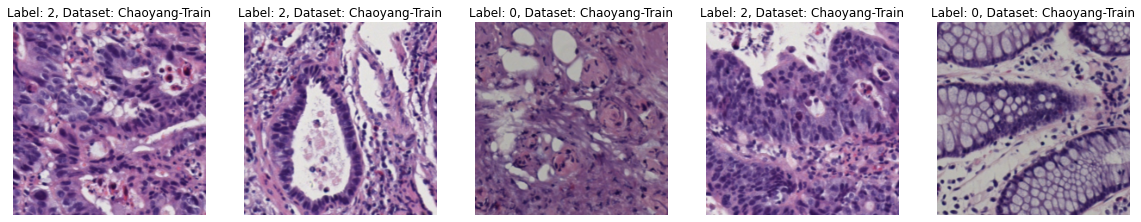

In [32]:
# Show 5 random images and labels from the train dataset
show_images(cy_train_dataset, num_images=5)


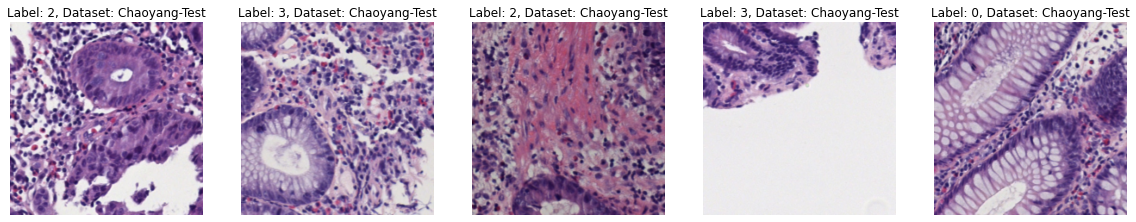

In [33]:
# Show 5 random images and labels from the test dataset
show_images(cy_test_dataset, num_images=5)

In [34]:
print(f"Train dataset length: {len(cy_train_dataset)}")
print(f"Test dataset length: {len(cy_test_dataset)}")

Train dataset length: 4021
Test dataset length: 2139


## 5. Run the test and trained datasets through: 
<br> a. Pixel Value Scaling
<br> b. noise detetion
<br> c. data augmentation 
<br> d. edge detection


define transformations

In [35]:
# Data augmentation
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Flips the image horizontally with a default 0.5 probability
    transforms.RandomRotation(40),      # Rotates the image by up to 40 degrees
])

In [36]:
# Apply Gaussian Blur to reduce noise
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))

In [37]:
import torch
from torchvision.transforms import functional as TF
import torch.nn.functional as F

In [38]:
class EdgeDetectionTransform(object):
    def __call__(self, img):
        # Assuming img is a tensor with shape [3, H, W] for RGB images
        # Define a Laplacian kernel for edge enhancement
        laplacian_kernel = torch.tensor([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=torch.float32)
        laplacian_kernel = laplacian_kernel.repeat(3, 1, 1).unsqueeze(1)  # Expand to [3, 1, 3, 3]

        # Apply the Laplacian kernel to each channel
        edges = F.conv2d(img.unsqueeze(0), laplacian_kernel, padding=1, groups=3)

        # Enhance the image by subtracting detected edges from the original
        enhanced_img = img - edges.squeeze(0) * 0.5  # Adjust the factor to reduce aggressiveness
        return torch.clamp(enhanced_img, 0, 1)

In [39]:
# Normalization (Pixel Value Scaling) using a common mean and std deviation
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [40]:
# Transform for training dataset
train_transforms = transforms.Compose([
    data_augmentation,
    gaussian_blur,
    transforms.ToTensor(),
    EdgeDetectionTransform(),
    normalize
])

# Transform for testing dataset (no data augmentation)
test_transforms = transforms.Compose([
    gaussian_blur,
    transforms.ToTensor(),
    EdgeDetectionTransform(),
    normalize
])

In [41]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, json_labels, dataset_name, transforms_list=None):
        self.root_dir = root_dir
        self.json_labels = json_labels
        self.dataset_name = dataset_name
        self.transforms_list = transforms_list or []

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.json_labels[idx]['name'])
        image = Image.open(img_path).convert('RGB')

        for transform in self.transforms_list:
            image = transform(image)  # Apply each transformation

        return image

    def __len__(self):
        return len(self.json_labels)

In [42]:
transforms_list = [
    transforms.Resize((228, 228)),  # Resize the image
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
    EdgeDetectionTransform()  # Custom edge detection
]

In [43]:
# Initialize the Chaoyang datasets with the complete set of transformations
cy_train_dataset = CustomImageDataset(
    root_dir='/Users/yukiekuang/Downloads/',
    json_labels=cy_train_labels,
    dataset_name='Chaoyang-Train',
    transforms_list=transforms_list   # Use the full set of transformations for training
)

cy_test_dataset = CustomImageDataset(
    root_dir='/Users/yukiekuang/Downloads/',
    json_labels=cy_test_labels,
    dataset_name='Chaoyang-Test',
    transforms_list=transforms_list   # Also apply the same transformations for testing
)

In [44]:
def apply_transformations_and_visualize(dataset, transformations, idx=0):
    dataset.transforms_list = []  # Reset transformations list
    for transform in transformations:
        dataset.transforms_list.append(transform)  # Add one transformation
        transformed_image = dataset[idx]  # Get the transformed image

        if isinstance(transformed_image, torch.Tensor):
            # Normalize the tensor for visualization if it's a tensor
            transformed_image = transformed_image.permute(1, 2, 0)  # Change CxHxW to HxWxC for matplotlib
            # Normalize to [0, 1] for proper visualization
            transformed_image = transformed_image - transformed_image.min()
            transformed_image = transformed_image / transformed_image.max()
        
        plt.imshow(transformed_image)
        plt.title(f"After applying: {type(transform).__name__}")
        plt.show()

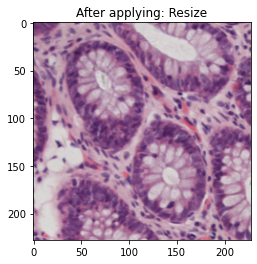

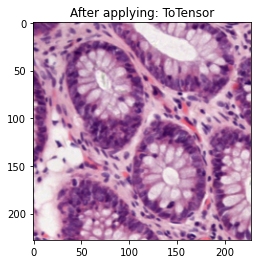

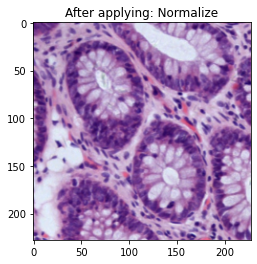

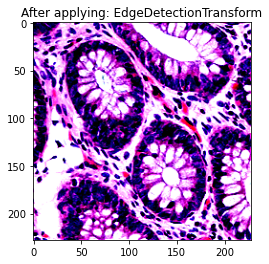

In [45]:
apply_transformations_and_visualize(cy_train_dataset, transforms_list)

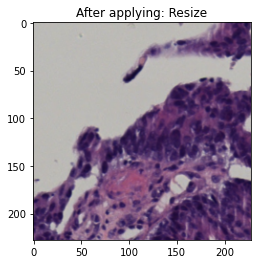

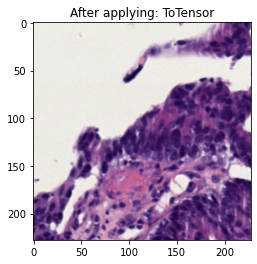

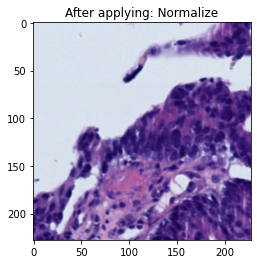

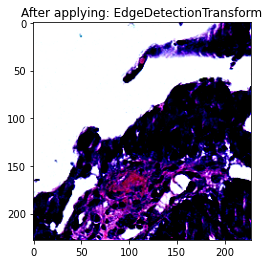

In [46]:

apply_transformations_and_visualize(cy_test_dataset, transforms_list)

In [47]:
print(cy_train_dataset[0])

tensor([[[0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.4166, 0.9646, 1.0000],
         ...,
         [1.0000, 1.0000, 0.4851,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 0.5621, 0.0000,  ..., 0.0000, 0.0000, 0.0768],
         [1.0000, 0.6591, 0.0000,  ..., 0.1625, 0.0000, 0.7561]],

        [[0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.9142, 0.7567, 1.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.3890, 1.0000],
         ...,
         [1.0000, 1.0000, 0.0826,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2865, 0.0820, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.0471, 0.0169, 0.0169,  ..., 1.0000, 1.0000, 1.0000],
         [0.0000, 0.0000, 0.1476,  ..., 0.6531, 0.9929, 1.

logistic regression
- define multiclass logistic regression model
- prepare dataset
- create data loaders
- Initialize the Model, Loss, and Optimizer
- training loop
- evaluate


In [48]:
import torch.nn as nn
import torch.optim as optim

In [49]:
class LabeledImageDataset(Dataset):
    def __init__(self, underlying_dataset, labels):
        self.underlying_dataset = underlying_dataset
        self.labels = {item['name']: item['label'] for item in labels}

    def __len__(self):
        return len(self.underlying_dataset)

    def __getitem__(self, idx):
        image = self.underlying_dataset[idx]
        img_name = self.underlying_dataset.json_labels[idx]['name']  
        label = self.labels[img_name]
        return image, torch.tensor(label, dtype=torch.long)

In [50]:
from torch.utils.data import DataLoader

In [51]:
# Assuming you have an instance of CustomImageDataset for training and testing
train_dataset = CustomImageDataset(root_dir='/Users/yukiekuang/Downloads/', json_labels=cy_train_labels, dataset_name='Chaoyang-Train', transforms_list=transforms_list)
test_dataset = CustomImageDataset(root_dir='/Users/yukiekuang/Downloads/', json_labels=cy_test_labels, dataset_name='Chaoyang-Test', transforms_list=transforms_list)

# Wrap the original datasets
wrapped_train_dataset = LabeledImageDataset(train_dataset, cy_train_labels)
wrapped_test_dataset = LabeledImageDataset(test_dataset, cy_test_labels)

# DataLoader instantiation
train_loader = DataLoader(wrapped_train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(wrapped_test_dataset, batch_size=64, shuffle=False)

In [52]:
class MulticlassLogisticRegression(nn.Module):
    def __init__(self, num_features, num_classes):
        super(MulticlassLogisticRegression, self).__init__()
        self.linear = nn.Linear(num_features, num_classes)
    
    def forward(self, x):
        return self.linear(x)

In [59]:
num_features = 228*228*3  # for RGB images
num_classes = 4 #  classifying for labels 0,1,2,3

model = MulticlassLogisticRegression(num_features, num_classes)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [60]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        outputs = model(images.view(images.shape[0], -1))  # Ensure images are flattened if needed
        loss = loss_function(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Testing loop
model.eval()
with torch.no_grad():
    total, correct = 0, 0
    for images, labels in test_loader:
        outputs = model(images.view(images.shape[0], -1))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Epoch 1, Loss: 233.4998321533203
Epoch 2, Loss: 128.5576171875
Epoch 3, Loss: 277.07513427734375
Epoch 4, Loss: 124.96995544433594
Epoch 5, Loss: 299.0606994628906
Epoch 6, Loss: 125.97997283935547
Epoch 7, Loss: 296.47296142578125
Epoch 8, Loss: 235.09475708007812
Epoch 9, Loss: 149.24224853515625
Epoch 10, Loss: 243.53758239746094
Accuracy: 13.32%


out of curiosity let's run the multiclass logistic regression again but x2 to see if there are any changes. 

In [61]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        outputs = model(images.view(images.shape[0], -1))  # Ensure images are flattened if needed
        loss = loss_function(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Testing loop
model.eval()
with torch.no_grad():
    total, correct = 0, 0
    for images, labels in test_loader:
        outputs = model(images.view(images.shape[0], -1))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Epoch 1, Loss: 74.50665283203125
Epoch 2, Loss: 171.07400512695312
Epoch 3, Loss: 126.50858306884766
Epoch 4, Loss: 81.28528594970703
Epoch 5, Loss: 121.99490356445312
Epoch 6, Loss: 71.11467742919922
Epoch 7, Loss: 150.50059509277344
Epoch 8, Loss: 81.7169189453125
Epoch 9, Loss: 84.0973129272461
Epoch 10, Loss: 78.38544464111328
Epoch 11, Loss: 89.1671142578125
Epoch 12, Loss: 130.19187927246094
Epoch 13, Loss: 62.65666961669922
Epoch 14, Loss: 108.74285125732422
Epoch 15, Loss: 105.22463989257812
Epoch 16, Loss: 93.66284942626953
Epoch 17, Loss: 112.14771270751953
Epoch 18, Loss: 51.78221893310547
Epoch 19, Loss: 47.408363342285156
Epoch 20, Loss: 78.33650970458984
Accuracy: 18.84%


There is a little improvement. BUT The accuracy is poor. 



<br> Ways to increase accuracy in multiclass logistic regression:
- change to a smaller adjusted learning rate. 
- optomization other than SGD could be used 
- adding more augmentation techniques such as zoom, and horizontal flipping 
- more epochs, allowing the model more iterations to learn can improve accuracy; monitor for overfitting. 

<br>OR
<br>
<br>A Simple Convolutional Neural Network (CNN) could be a much better choice for image classification tasks, especially with the complexity inherent in tasks like colon cancer classification from images. CNNs are particularly well-suited for this type of data because they can capture spatial hierarchies in images due to their convolutional filters.

SimpleCNN
- define cnn model
- define loss function and optimizer
- train and validate the model
- evaluate

In [62]:
class SimpleCNN(nn.Module):
    def __init__(self, img_size, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # Convolutional layer with 16 filters
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # Convolutional layer with 32 filters
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Convolutional layer with 64 filters

        # Calculate the output size after each convolution and pooling
        def output_size(input_size, kernel_size=3, stride=1, padding=1, pool_kernel_size=2, pool_stride=2):
            output = (input_size + 2*padding - kernel_size) // stride + 1
            output = (output - pool_kernel_size) // pool_stride + 1
            return output

        # Calculate the size of the output from the final pooling layer
        conv_output_size = output_size(output_size(output_size(img_size)))

        # Flatten the output from the last convolutional layer
        self.fc_input_size = conv_output_size * conv_output_size * 64  # 64 is the number of output channels from conv3

        self.fc1 = nn.Linear(self.fc_input_size, 256)                  # Fully connected layer
        self.fc2 = nn.Linear(256, num_classes)                         # Output layer

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # Activation and pooling
        x = F.relu(F.max_pool2d(self.conv2(x), 2))  # Activation and pooling
        x = F.relu(F.max_pool2d(self.conv3(x), 2))  # Activation and pooling
        x = x.view(-1, self.fc_input_size)          # Flatten the features for the fully connected layer
        x = F.relu(self.fc1(x))                     # Activation for fully connected
        x = self.fc2(x)                             # Final output
        return x

In [63]:
# parameters
img_size = 228
num_classes = 4

model = SimpleCNN(img_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer
loss_function = nn.CrossEntropyLoss()  # Cross-Entropy Loss for multi-class classification

In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
)

In [65]:
# Setup early stopping and checkpoint parameters
best_train_loss = float('inf')
patience = 5
epochs_since_improvement = 0
best_model_path = '/Users/yukiekuang/Downloads/best_model.pth'
torch.save(model.state_dict(), best_model_path)

In [66]:
# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)

    # Print training stats
    print(f'Epoch {epoch+1}| Average Loss: {avg_train_loss:.4f}')
    # Check if this is the best model based on training loss and save
    if avg_train_loss < best_train_loss:
        best_train_loss = avg_train_loss
        epochs_since_improvement = 0
        torch.save(model.state_dict(), best_model_path)
    else:
        epochs_since_improvement += 1
        print(f'No improvement in training loss for {epochs_since_improvement} epochs.')
    
    # Early stopping check
    if epochs_since_improvement >= patience:
        print('Early stopping triggered.')
        break

    

Epoch 1| Average Loss: 1.3708
Epoch 2| Average Loss: 1.1485
Epoch 3| Average Loss: 1.0588
Epoch 4| Average Loss: 0.9662
Epoch 5| Average Loss: 0.8892
Epoch 6| Average Loss: 0.7492
Epoch 7| Average Loss: 0.5719
Epoch 8| Average Loss: 0.3599
Epoch 9| Average Loss: 0.2189
Epoch 10| Average Loss: 0.1309
Epoch 11| Average Loss: 0.0924
Epoch 12| Average Loss: 0.0477
Epoch 13| Average Loss: 0.0102
Epoch 14| Average Loss: 0.0040
Epoch 15| Average Loss: 0.0371
No improvement in training loss for 1 epochs.


In [67]:
# Validation loop
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 50.86%


It's not perfect but this is still a pretty big jump compared to the multiclass logistic regression. 

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [71]:
# Test loop with metrics
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_preds, average='macro')  # 'macro' for unweighted mean across classes
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')


print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.45
Recall: 0.46
F1 Score: 0.45


Precision (0.45): The precision score tells you that, of the predictions made by the model for a given class, 45% were correct. This metric is fairly low but suggests the model does have some ability to correctly identify positive samples.
Recall (0.46): A recall of 0.46 means the model correctly identifies 46% of all actual positives across classes. This score indicates the model's ability to find all relevant instances in the dataset.
F1 Score (0.45): The F1 score, which balances precision and recall, is also low, indicating the model is struggling both in terms of the accuracy of the positive predictions it makes and its ability to find all the positive samples.

Confusion matrix for evaluation:

In [72]:
from sklearn.metrics import confusion_matrix

def get_all_preds(model, data_loader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

labels, preds = get_all_preds(model, test_loader)
conf_matrix = confusion_matrix(labels, preds)
print(conf_matrix)

[[281  62 284  78]
 [ 80  49 143  49]
 [ 98  82 595  65]
 [ 20  41  49 163]]


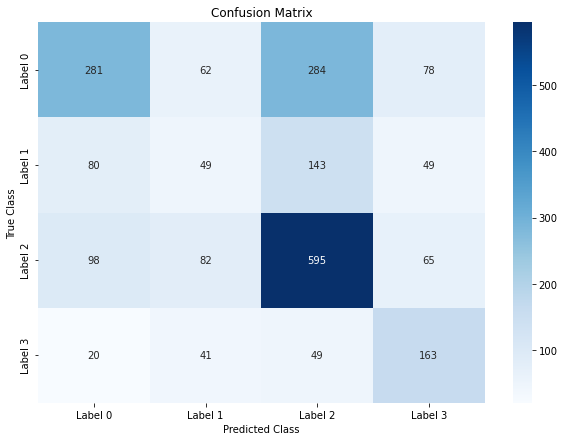

In [73]:
class_labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3']

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

There seems to be misclassification between label 0 and 2 although the model is predicting label 2 well. 

| <u>DataFrame        | <u>Label | <u>Count |
|------------------|-------|-------|
| <b>cy_df_train_df   | 2     | 1404  |
|                  | 0     | 1111  |
|                  | 1     | 842   |
|                  | 3     | 664   |
| <b>cy_df_test_df    | 2     | 840   |
|                  | 0     | 705   |
|                  | 1     | 321   |
|                  | 3     | 273   |

To fix:
- Model Complexity: Consider whether a more complex or a different model architecture might capture the nuances between classes better.
- Balanced Training: Address the class imbalance more aggressively, possibly through more sophisticated sampling strategies or targeted data augmentation for underrepresented classes.

In [82]:
# Adjusting class weights inversely proportional to the class frequencies
weights = torch.tensor([1.0 / 1111, 1.0 / 842, 1.0 / 1404, 1.0 / 664])
weights = weights / weights.sum()  # Normalize to make the sum of weights equal to 1
criterion = nn.CrossEntropyLoss(weight=weights.to(device))

In [83]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [84]:
class SimpleCNN(nn.Module):
    def __init__(self, img_size, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(0.5)

        # Output size calculation
        def output_size(input_size, kernel_size=3, stride=1, padding=1, pool_kernel_size=2, pool_stride=2):
            output = (input_size + 2 * padding - kernel_size) // stride + 1
            output = (output - pool_kernel_size) // pool_stride + 1
            return output

        # Calculate the size of the output from the final pooling layer
        conv_output_size = output_size(output_size(output_size(img_size)))
        self.fc_input_size = conv_output_size * conv_output_size * 64

        self.fc1 = nn.Linear(self.fc_input_size, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(F.max_pool2d(self.conv1(x), 2)))
        x = F.relu(self.bn2(F.max_pool2d(self.conv2(x), 2)))
        x = F.relu(self.bn3(F.max_pool2d(self.conv3(x), 2)))
        x = x.view(-1, self.fc_input_size)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [85]:
# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)

    # Print training stats
    print(f'Epoch {epoch+1}| Average Loss: {avg_train_loss:.4f}')
    # Check if this is the best model based on training loss and save
    if avg_train_loss < best_train_loss:
        best_train_loss = avg_train_loss
        epochs_since_improvement = 0
        torch.save(model.state_dict(), best_model_path)
    else:
        epochs_since_improvement += 1
        print(f'No improvement in training loss for {epochs_since_improvement} epochs.')
    
    # Early stopping check
    if epochs_since_improvement >= patience:
        print('Early stopping triggered.')
        break

    

Epoch 1| Average Loss: 0.0565
No improvement in training loss for 1 epochs.
Epoch 2| Average Loss: 0.0007
No improvement in training loss for 2 epochs.
Epoch 3| Average Loss: 0.0003
No improvement in training loss for 3 epochs.
Epoch 4| Average Loss: 0.0002
No improvement in training loss for 4 epochs.
Epoch 5| Average Loss: 0.0006
No improvement in training loss for 5 epochs.
Early stopping triggered.


In [86]:
# Validation loop
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 51.29%


In [87]:
# Test loop with metrics
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_preds, average='macro')  # 'macro' for unweighted mean across classes
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')


print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.47
Recall: 0.46
F1 Score: 0.47


In [88]:
def get_all_preds(model, data_loader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

labels, preds = get_all_preds(model, test_loader)
conf_matrix = confusion_matrix(labels, preds)
print(conf_matrix)

[[369 104 189  43]
 [ 91  86 110  34]
 [146 124 523  47]
 [ 29  84  41 119]]


oh no:
- Class Imbalance: Classes 1 and 3 have significantly fewer correct predictions compared to Classes 0 and 2, suggesting possible issues with class imbalance or feature representation for these classes.
- Common Misclassifications: There are notable misclassifications between certain classes (e.g., Class 0 with Class 2, and Class 3 with Class 1), indicating possible similarities in features that the model is confusing.

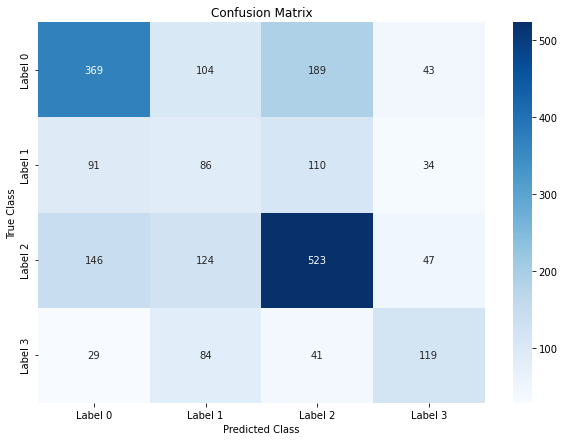

In [89]:
class_labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3']

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

-------------